# Chinese Loans to Africa

* **Data:** `china-loans-to-africa.csv`
* **Description:** A database of loans made between Chinese financiers and African recipients
* **Source:** https://www.bu.edu/gdp/research/databases/global-china-databases/#Chinese-Loans
* **Columns of interest:**
    * `year` is the year of the loan
    * `country` is the country of the loan recipient
    * `region` is the region of Africa (CA = Central, EA = Eastern, etc). Note that `RG` is regional investment.
    * `borrowerNotGouv` is the recipient of the loan
    * `financier` is the (Chinese) source of the loan
    * `cleanUSD` is the reported value converted to US dollars
    * `purpose` is a description of what the loan is for

Note that questions like "What country has received the most loans from China?" are an inaccurate way to portray the loans because the government of the country wasn't the loan recipient. Additionally, reports of these loans are collected by an organization, not released by an official source, so there are a thousand and one additional caveats about trusting the data. But I think generally you should be able to understand what I mean by my questions.

## Read in your data

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,.2f}'.format)

/Users/richardabbey/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
df = pd.read_csv("china-loans-to-africa.csv")

## What country has received the most loans from China?

In [5]:
#Counting the countries in the country column to identify which showed up most
df.country.value_counts().head()

Angola                          254
Zambia                           78
Sudan                            67
Democratic Republic of Congo     55
Ethiopia                         52
Name: country, dtype: int64

## What is the total amount of Chinese loans to African governments/organizations, in US dollars?

Write out the total amount in a comment, as `The total amount of loans is $____`. Note that the column is in **millions**.

In [7]:
#The sum provides the total amount of USD loans issued.
df.cleanUSD.sum()

153233

In [8]:
df

,status,year,country,region,borrowerCode,borrowerType,borrowerNotGouv,financier,financeType,group,reportedValue,reportedUnit,cleanUSD,interestRate,liborRate,repayment,grace,term,purpose
0,Completed,2002,Angola,CA,NaN,NaN,Government,CIDCA,ZIL,1.00,50,CNY,6,0,NaN,NaN,NaN,NaN,Luanda Hospital
1,Signed,2003,Angola,CA,NaN,NaN,Government,CIDCA,ZIL,1.00,11,USD,11,0,NaN,NaN,NaN,NaN,Economic Housing Project
2,Completed,2005,Angola,CA,NaN,NaN,Government,Eximbank,FA-sub,1.00,41,USD,41,NaN,Libor + 1.5,NaN,5.00,17,"Andulo, Bié and Caála, Huambo, Construction of..."
3,Completed,2005,Angola,CA,NaN,NaN,Government,Eximbank,FA-sub,1.00,15,USD,15,NaN,Libor + 1.5,NaN,5.00,17,"Quéssua, Malange, Agrarian Institute Rebuild"
4,Completed,2005,Angola,CA,NaN,NaN,Government,Eximbank,FA-sub,1.00,53,USD,53,NaN,Libor + 1.5,NaN,5.00,17,"Benguela, 2 Institute of Technology Constructi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Signed,2016,Togo,WA,NaN,NaN,Government,Eximbank,CL,1.00,36000,XOF,57,NaN,NaN,NaN,NaN,NaN,Adjarala Dam 147MW Add-on Loan
1139,Completed,2016,Togo,WA,NaN,NaN,Government,CIDCA,ZIL,1.00,39000,XOF,62,0,NaN,NaN,NaN,NaN,Lome International Airport Taxiway and Corrido...
1140,Completed,2012,Togo,WA,NaN,NaN,Government,Eximbank,EBC,1.00,75,USD,75,NaN,NaN,NaN,NaN,NaN,"New Lome International Airport (EBC portion, t..."
1141,Completed,2016,Togo,WA,NaN,NaN,Government,Eximbank,Loan,1.00,32640,XOF,44,NaN,NaN,NaN,NaN,NaN,Niamtougou Airport Re-development


## What is the largest investment in the dataset?

In [67]:
#To identify this, first step involves grouping by purpose of the loan.
#Second, identifying the amount that went into it.

df.groupby(by='purpose').cleanUSD.sum().sort_values(ascending=False).head()

purpose
Sonangol Recapitalization                                         10000
Sonangol Development                                               7500
Caculo Cabaca Hydropower Project 2170MW and transmission lines     3700
Kilamba Kiaxi New Town                                             2500
Multisector                                                        2200
Name: cleanUSD, dtype: int64

## How many loans were used for hospitals?

In [13]:
#df.purpose column provides a description of the column,
#to search for hospital, we look through that column using .str.contains
#then i use the results from the search to create a df
hospital = df[df.purpose.str.contains("Hospital")]

In [69]:
#Len enables me to get the length of the hospital df
#This shows the number of times hospital had appeared in the loan description
len(hospital.purpose)

23

## Who was the most common loan financier?

In [17]:
#Value counts on the financier column shows up the lenders
df.financier.value_counts().head()

Eximbank    628
CIDCA       202
CDB         161
ICBC         34
BoC          21
Name: financier, dtype: int64

## Who was the most common loan financier for loans going to Ghana?

In [18]:
#First, identify where country is Ghana
#Look at the financiers involved
#Count them and look at the first five

df[df.country == 'Ghana'].financier.value_counts().head()

Eximbank                                                  18
China International Water & Electric Corporation (CWE)     5
CIDCA                                                      5
CDB                                                        4
ICBC                                                       4
Name: financier, dtype: int64

## Who were the top 3 most common loan financiers in each region?

In [20]:
#First group by region
#Second look at the financiers involved
#Pull out the largest 3 financiers in each region

df.groupby('region').financier.value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3)

region  financier
CA      Eximbank     255
        CDB          118
        CIDCA         50
EA      Eximbank     190
        CIDCA         83
        CDB           15
RG      CDB            8
        Eximbank       7
        PBC            2
SA      Eximbank      17
        CIDCA         10
        CDB            8
WA      Eximbank     111
        CIDCA         40
        ICBC           7
Name: financier, dtype: int64

## What country received the highest total investment?

In [26]:
#First, group by country
#Look at the loan amounts ie CleanUSD
#Sort the values and choose top five
df.groupby(by='country').cleanUSD.sum().sort_values(ascending=False).head()

country
Angola      42650
Ethiopia    13729
Zambia       9884
Kenya        8999
Nigeria      7204
Name: cleanUSD, dtype: int64

## Plot a line graph of the number of loans each year.

It's okay if your x axis looks awful, but make sure it's ordered correctly.

<AxesSubplot:>

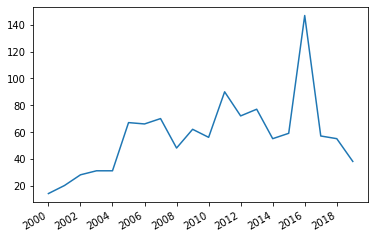

In [76]:
df.year.value_counts().plot()

## Plot a line graph of the total amount (in USD) of the loans per year.

It's okay if your x axis looks awful, but make sure it's ordered correctly.

In [30]:
df.year = pd.to_datetime(df.year, errors='coerce', format="%Y")

<AxesSubplot:xlabel='year'>

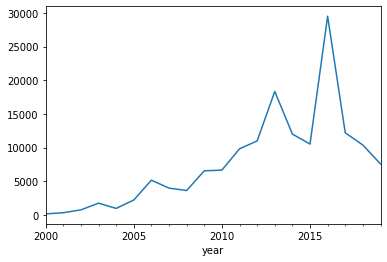

In [33]:
df.resample('Y', on='year').cleanUSD.sum().plot()

## For each region, what are the top three countries in terms of total number of loans?

In [34]:
#First group by region
#Second look at the countries involved
#Pull out the top 3 countries in each region

df.groupby('region').country.value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3)

region  country                     
CA      Angola                          254
        Democratic Republic of Congo     55
        Cameroon                         45
EA      Zambia                           78
        Ethiopia                         52
        Kenya                            42
RG      Regional                         18
SA      South Africa                     21
        Botswana                         13
        Namibia                          12
WA      Ghana                            42
        Cote d'Ivoire                    24
        Nigeria                          19
Name: country, dtype: int64

## Make a dataset of loans that did not go directly to governments, save it as `non-govt.csv`

In [59]:
df.borrowerNotGouv.value_counts().head()

# df[df.borrowerNotGouv == 'Government'].value_counts()

Government                                                     1017
Zambia Electricity Supply Corporation Limited (ZESCO) (SOE)      13
South African Reserve Bank (SARB) (SOE)                          11
Sudan National Electricity Corporation (NEC) (SOE)                7
Transnet SOC Ltd (Transnet) (SOE)                                 6
Name: borrowerNotGouv, dtype: int64

In [53]:
borrowerNotGouv

Index(['status', 'year', 'country', 'region', 'borrowerCode', 'borrowerType',
       'borrowerNotGouv', 'financier', 'financeType', 'group', 'reportedValue',
       'reportedUnit', 'cleanUSD', 'interestRate', 'liborRate', 'repayment',
       'grace', 'term', 'purpose'],
      dtype='object')